## Import Libraries

In [1]:
#Visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap 
#Libraries for ML
from sklearn.preprocessing import StandardScaler #Standardizasyon için
from sklearn.model_selection import train_test_split, GridSearchCV #GridSearchCV: KNN ile ilgili en iyi parametreleri belirlemek
from sklearn.metrics import accuracy_score ,confusion_matrix #Sonuç değerlendirme
from sklearn.neighbors import KNeighborsClassifier,LocalOutlierFactor #Trainin algoritması ve NCA ve Outlier değerler için
from sklearn.decomposition import PCA #PCA için

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# plotly
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import itertools
plt.style.use('fivethirtyeight')
import seaborn as sns
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("D:\InternIQ Projects"))

# Any results you write to the current directory are saved as output.

['.ipynb_checkpoints', 'Creditcard Dataset.csv', 'Diabetes Dataset.csv', 'House prediction dataset', 'sample_submission.csv', 'submission.csv', 'T1_Red Wine Quality Prediction.ipynb', 'T2_Credit Card Fraud Detection.ipynb', 'T3_House Price Prediction.ipynb', 'T4_Diabetes Prediction.ipynb', 'test.csv', 'train.csv', 'WineEquality-Red Dataset.csv']


<a id ="1"></a><br>
## Loading Dataset

In [2]:
#Read data
data = pd.read_csv("D:\InternIQ Projects\Diabetes Dataset.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#Split Data as M&B
p = data[data.Outcome == 1]
n = data[data.Outcome == 0]

<a id ="2"></a><br>
## Basic Visualization

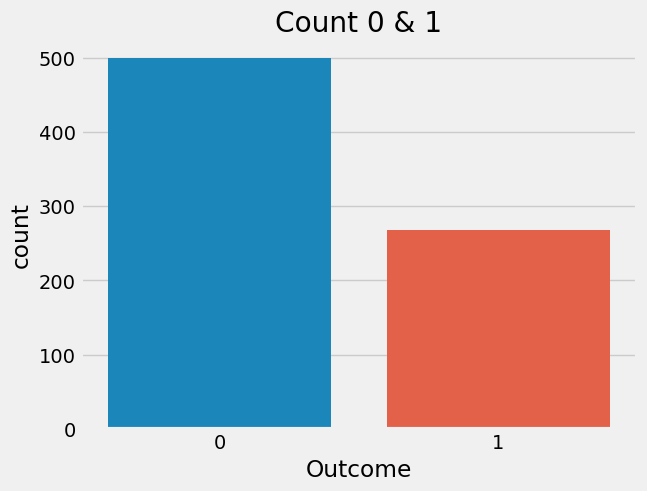

In [4]:
sns.countplot(x='Outcome',data=data)
plt.title("Count 0 & 1")
plt.show()

<a id ="3"></a><br>
# Exploratory Data Analysis(EDA)

In [5]:
print('Data Shape',data.shape)
print(data.info()) 
describe = data.describe()
describe.T

Data Shape (768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


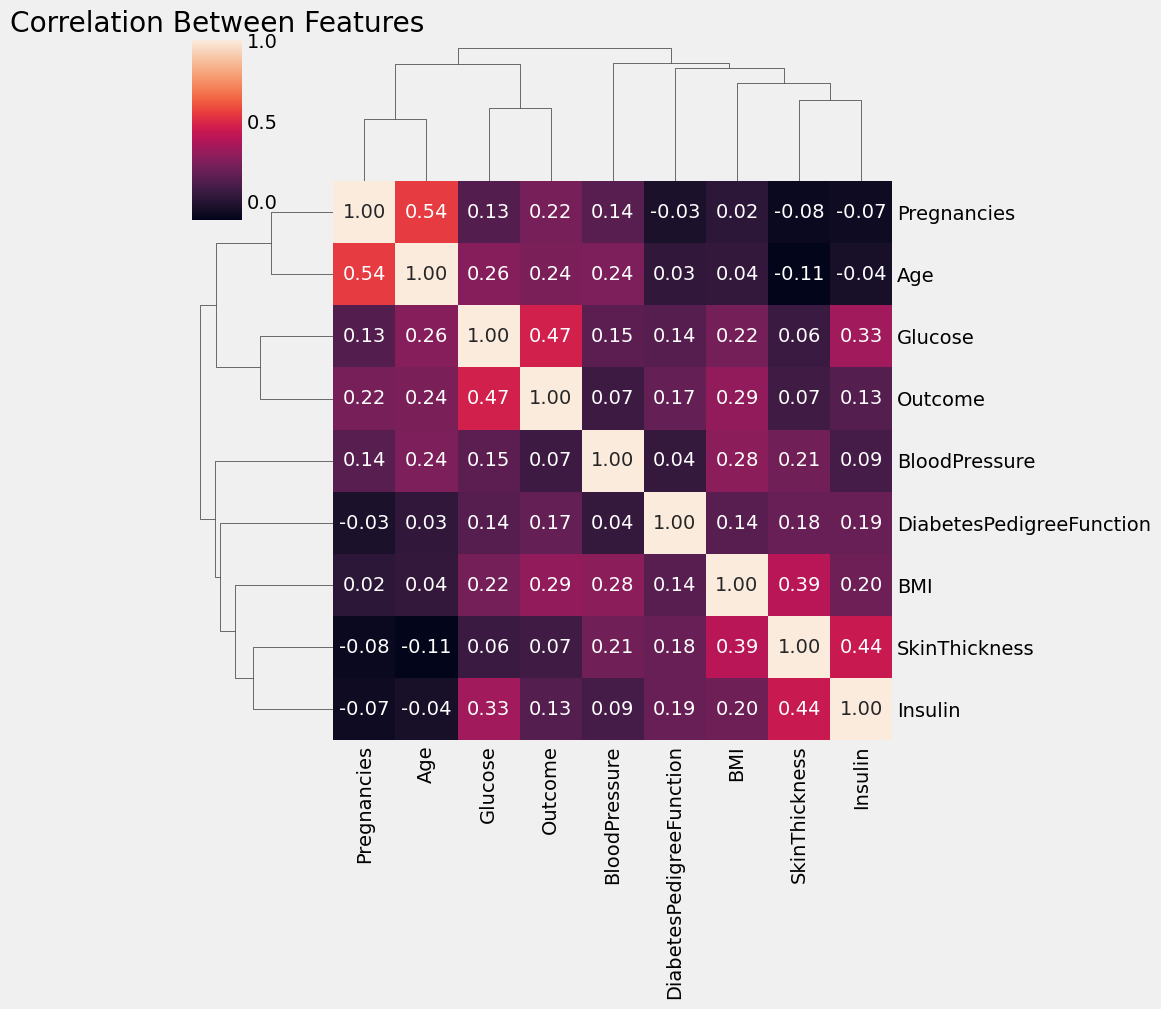

In [6]:
corr_data = data.corr() 
sns.clustermap(corr_data,annot= True,fmt = '.2f')
plt.title('Correlation Between Features')
plt.show();

<a id ="4"></a><br>
## Feautre Visualization with Box plot [Before Standardization]

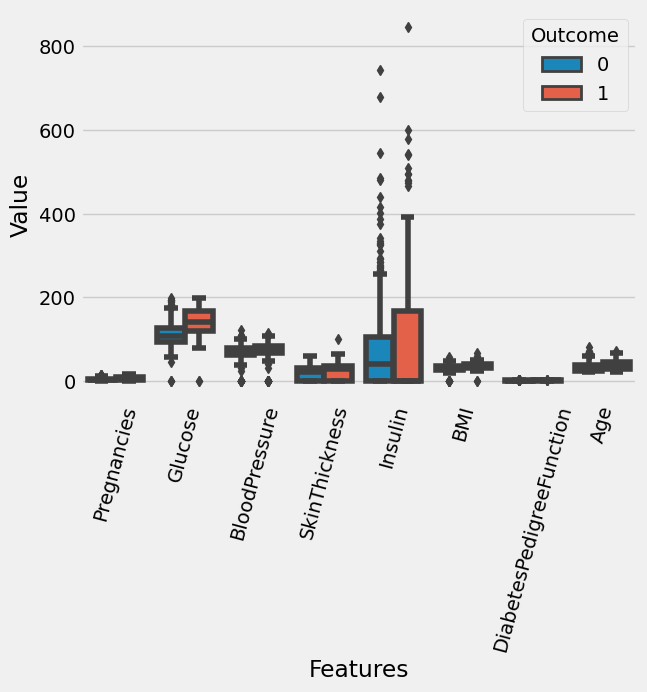

In [7]:
#Box plot
data_melted = pd.melt(data,id_vars='Outcome',
                      var_name='Features',
                      value_name='Value')

plt.figure()
sns.boxplot(x='Features',y='Value',hue='Outcome',data=data_melted) #Featureslar target'a göre ayrıldı.
plt.xticks(rotation=75) #Feature isimleri 90 derece dik görülecek.
plt.show()


<a id ="5"></a><br>
## Analysis of Diabetic Cases

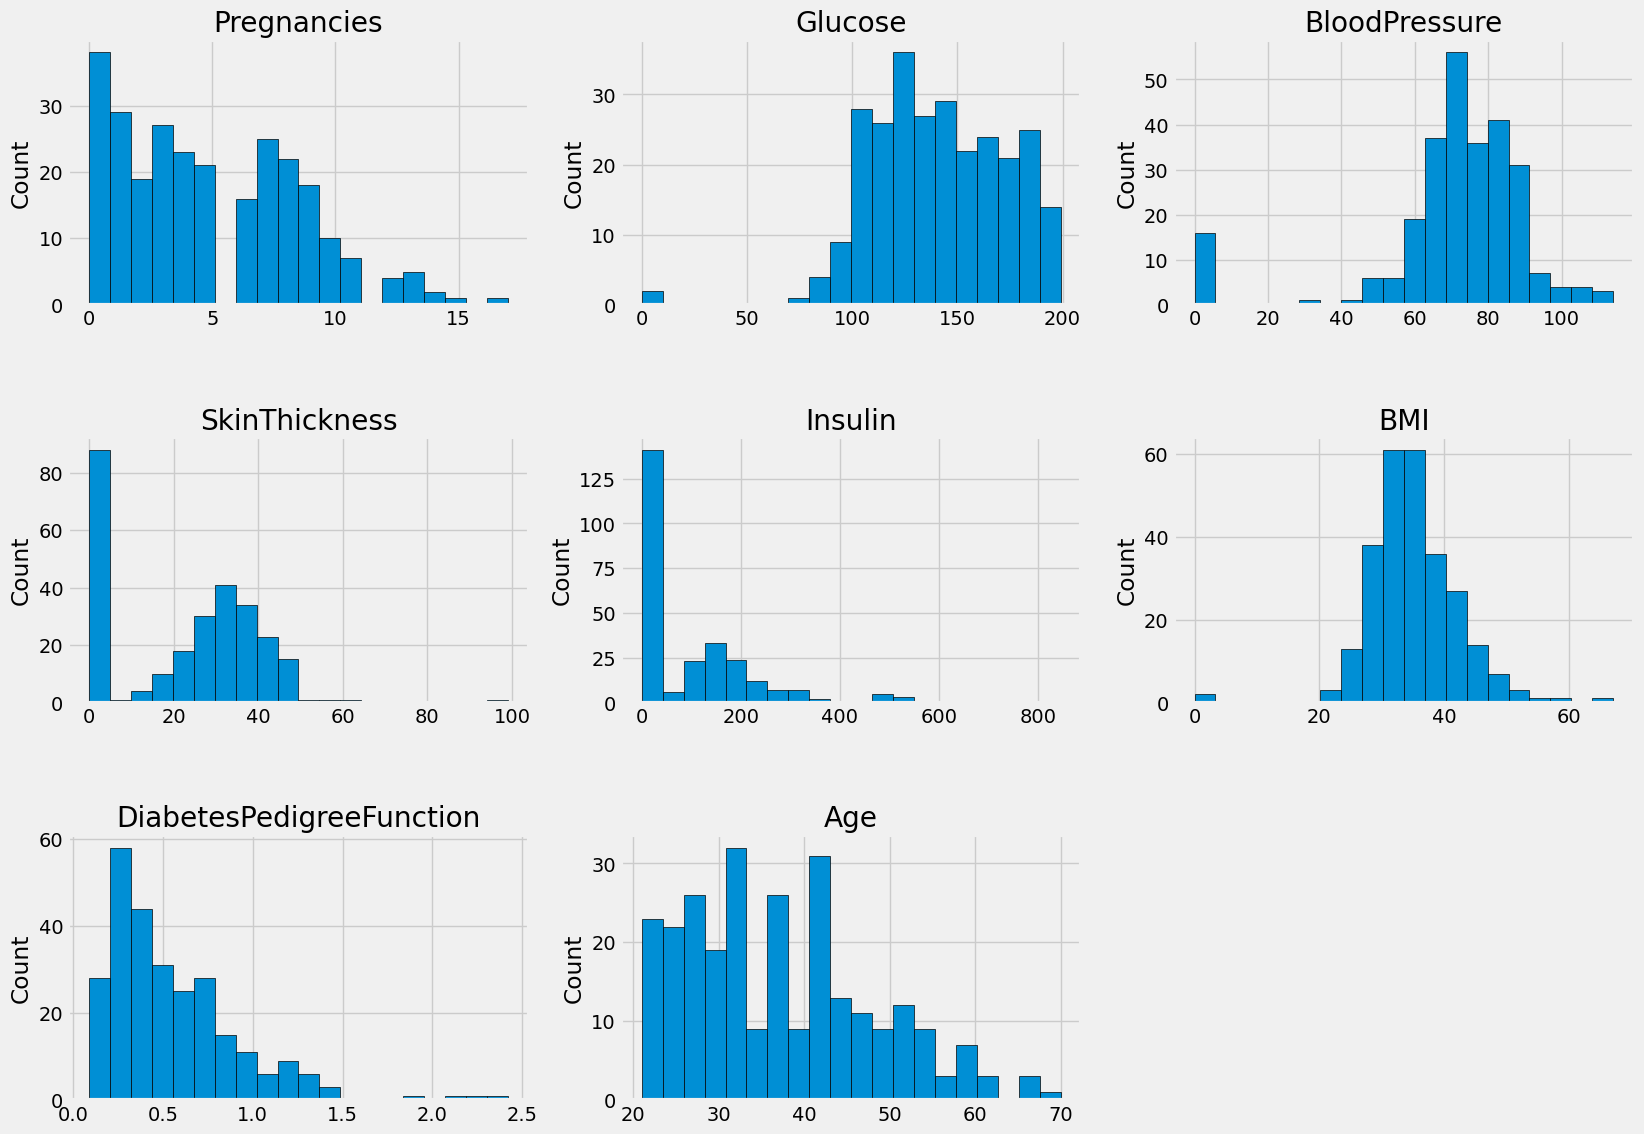

In [8]:
#General Analysis

data1 = data[data["Outcome"]==1]
columns = data.columns[:8]
plt.subplots(figsize=(18,18))
length =len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length//2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    plt.ylabel("Count")
    data1[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

<a id ="6"></a><br>
## Analysis of Non-Diabetic Cases

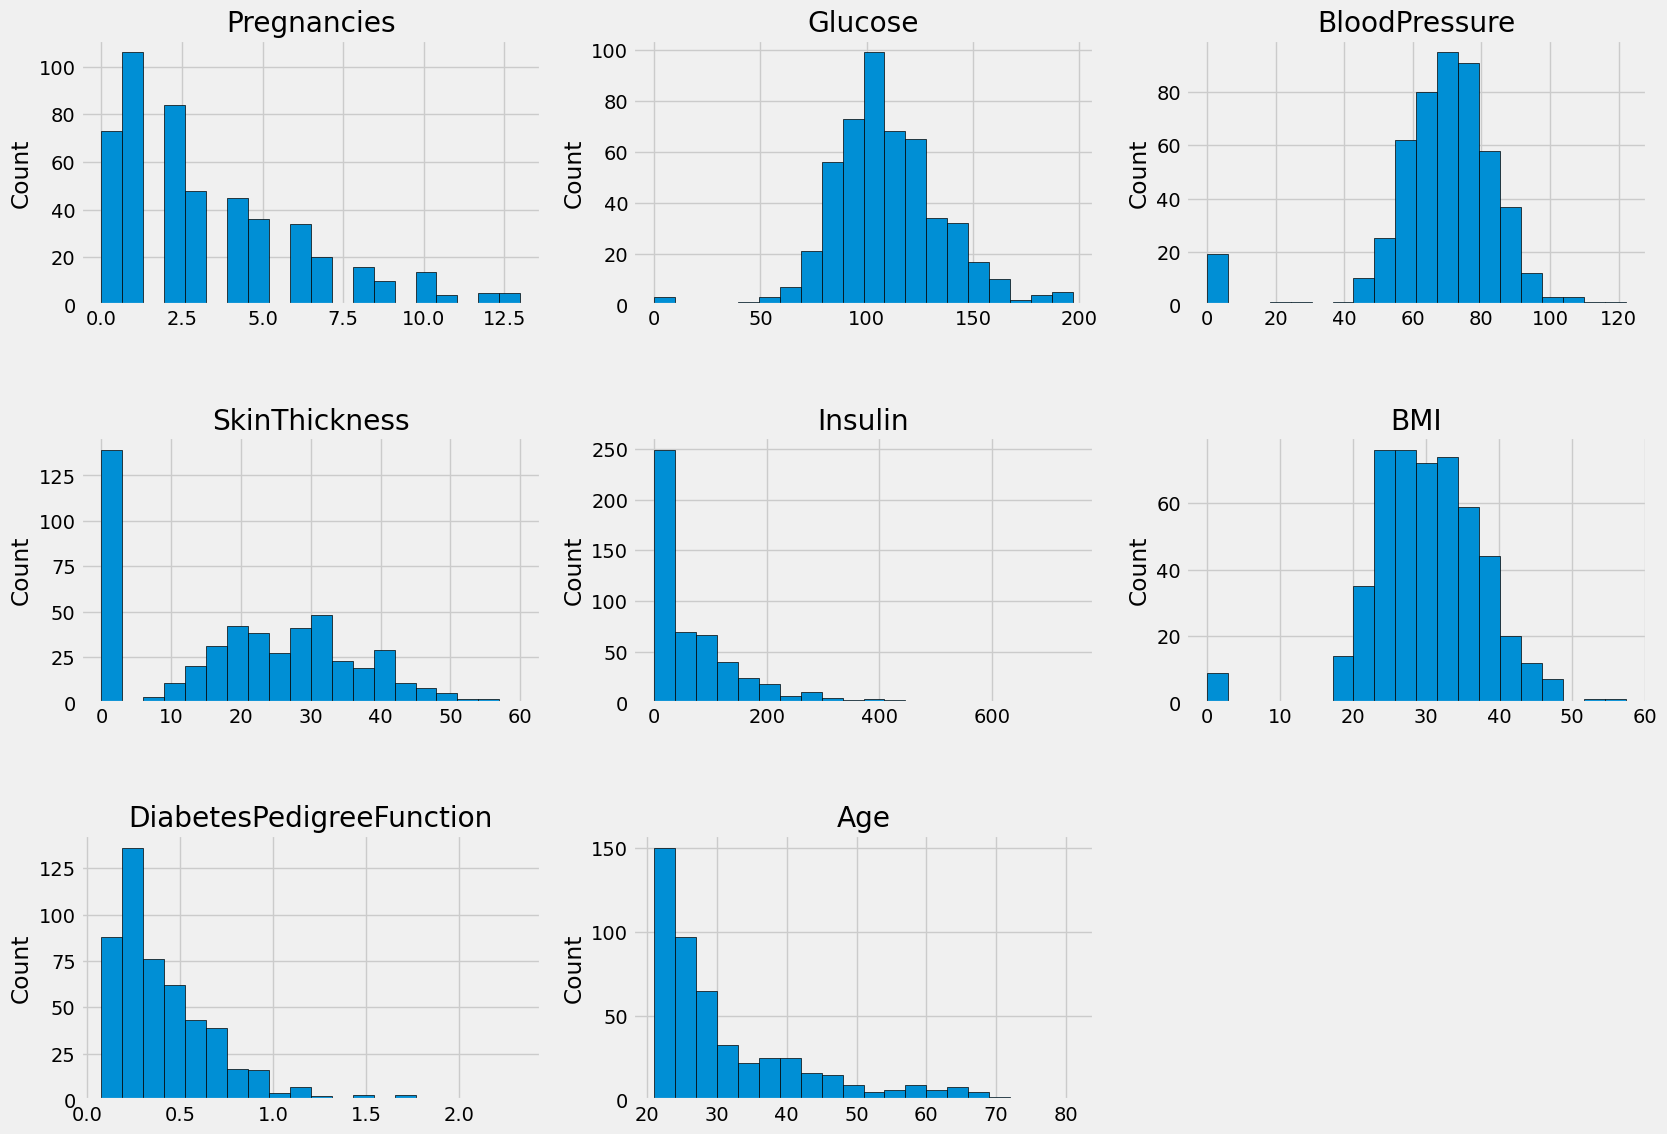

In [9]:
#General Analysis

data1 = data[data["Outcome"]==0]
columns = data.columns[:8]
plt.subplots(figsize=(18,18))
length =len(columns)
for i,j in itertools.zip_longest(columns,range(length)):
    plt.subplot((length//2),3,j+1)
    plt.subplots_adjust(wspace=0.2,hspace=0.5)
    plt.ylabel("Count")
    data1[i].hist(bins=20,edgecolor='black')
    plt.title(i)
plt.show()

<a id ="7"></a><br>
## Visualization of Features

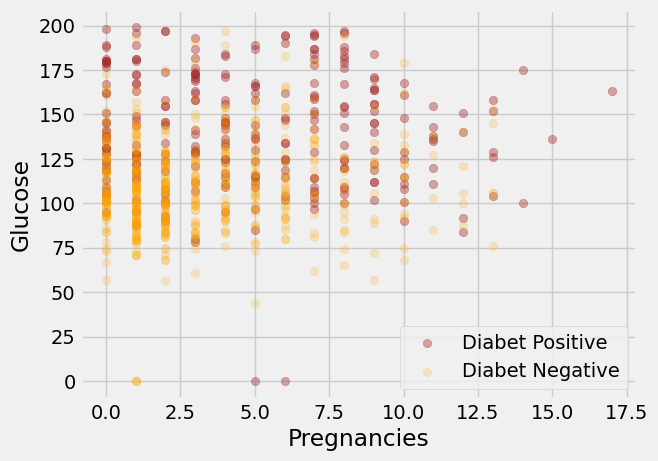

In [10]:
#Visualization, Scatter Plot

plt.scatter(p.Pregnancies,p.Glucose,color = "brown",label="Diabet Positive",alpha=0.4)
plt.scatter(n.Pregnancies,n.Glucose,color = "Orange",label="Diabet Negative",alpha=0.2)
plt.xlabel("Pregnancies")
plt.ylabel("Glucose")
plt.legend()
plt.show()

#We appear that it is clear segregation.

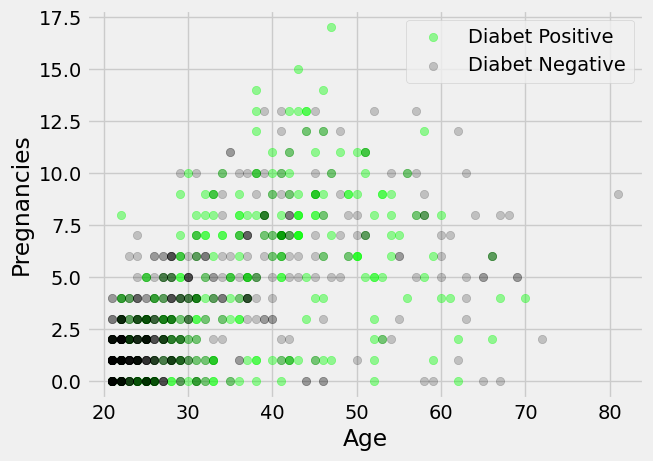

In [11]:
#Visualization, Scatter Plot

plt.scatter(p.Age,p.Pregnancies,color = "lime",label="Diabet Positive",alpha=0.4)
plt.scatter(n.Age,n.Pregnancies,color = "black",label="Diabet Negative",alpha=0.2)
plt.xlabel("Age")
plt.ylabel("Pregnancies")
plt.legend()
plt.show()

#We appear that it is clear segregation.

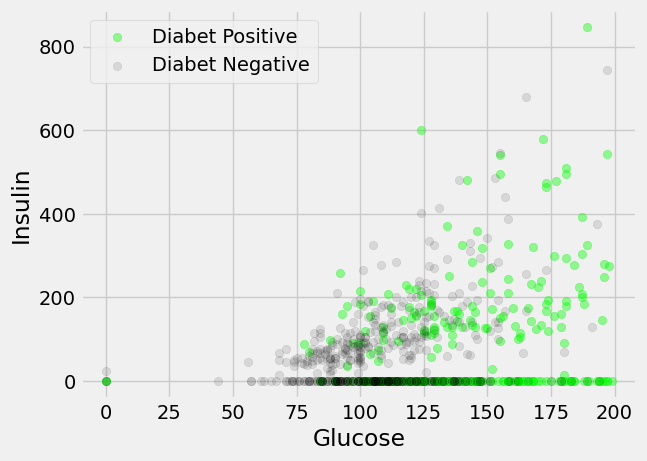

In [12]:
#Visualization, Scatter Plot

plt.scatter(p.Glucose,p.Insulin,color = "lime",label="Diabet Positive",alpha=0.4)
plt.scatter(n.Glucose,n.Insulin,color = "black",label="Diabet Negative",alpha=0.1)
plt.xlabel("Glucose")
plt.ylabel("Insulin")
plt.legend()
plt.show()

#We appear that it is clear segregation.

<a id ="8"></a><br>
## Findings Outlier

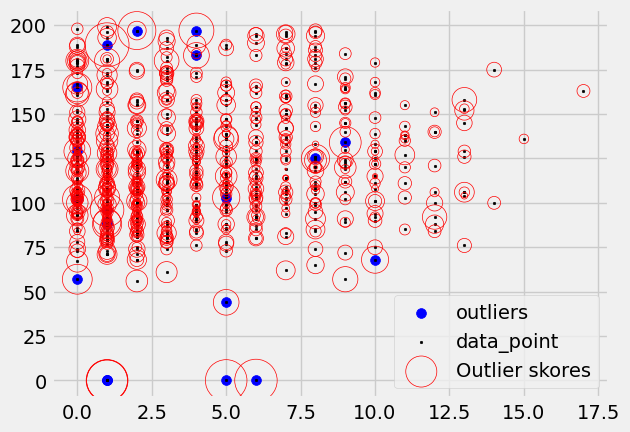

In [13]:
x = data.drop(['Outcome'],axis=1) 
y = data.Outcome
columns = x.columns.tolist() # Featureların isimlerini bir listede topladık.

clf = LocalOutlierFactor() #KNN değeri gerekiyor. Tanımlı değeri 20 ve bizde 20 kullanacağız. O nedenle birşey yazmayacağız.
y_pred = clf.fit_predict(x) #LOF uygulayıo negetif outlier f. alıyoruz.

x_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score['score'] = x_score

threshold_outliers = -1.5
filtre = outlier_score['score'] < threshold_outliers
outlier_index = outlier_score[filtre].index.tolist() #outlier değerlerine threshold uygulanmış olanları bir listeye attık

plt.figure()
plt.scatter(x.iloc[outlier_index,0], x.iloc[outlier_index,1],color = 'blue',s=50,label='outliers')
plt.scatter(x.iloc[:,0]
            ,x.iloc[:,1],color='k',s=3,label='data_point') #s : boyut

radius = (x_score.max() - x_score ) / (x_score.max() - x_score.min() ) #Değerleri normalize ederek biası önledik
outlier_score['radius '] = radius

plt.scatter(x.iloc[:,0], x.iloc[:,1], s=1000*radius, edgecolors='r',facecolor='none',label='Outlier skores')
plt.legend()
plt.show();

## Drop Outliers

In [14]:
x = x.drop(outlier_index) #outliers remove
y = y.drop(outlier_index).values #outliers remove

<a id ="9"></a><br>
## Train Test Split & Standardization Processing

In [15]:
test_size = 0.2

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=test_size,random_state=42)

In [16]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train) #scaler isimli bir değişkene Standartscaler metodunu atayıp sonra bu değişken aracılığıyla xtraindeki verileri standardize ettik

x_test = scaler.transform(x_test)

x_train_df = pd.DataFrame(x_train,columns=columns)
x_train_df_describe = x_train_df.describe()
x_train_df['target'] = y_train

<a id ="10"></a><br>
## Box Plot Visualization after the Standardization

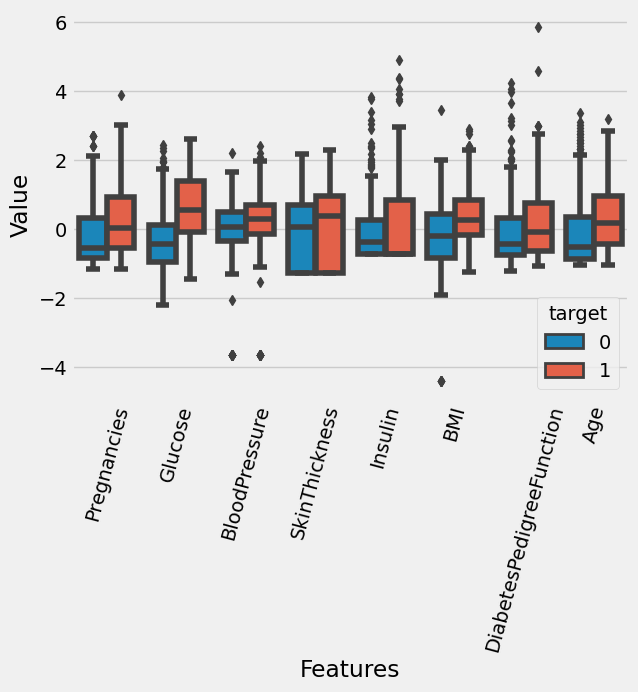

In [17]:
data_melted = pd.melt(x_train_df,id_vars='target',
                      var_name='Features',
                      value_name='Value')

plt.figure()
sns.boxplot(x='Features',y='Value',hue='target',data=data_melted) #Featureslar target'a göre ayrıldı.
plt.xticks(rotation=75) #Feature isimleri 90 derece dik görülecek.
plt.show()

<a id ="11"></a><br>
# Machine Learning Models

<a id ="12"></a><br>
## Logistic Regression (LR)

In [18]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [19]:
#K-fold CV
from sklearn.model_selection import cross_val_score
accuraccies = cross_val_score(estimator = LR, X= x_train, y=y_train, cv=10)
print("Average Accuracies: ",np.mean(accuraccies))
print("Standart Deviation Accuracies: ",np.std(accuraccies))

Average Accuracies:  0.7502542372881356
Standart Deviation Accuracies:  0.04536417977366145


In [20]:
LR.fit(x_train,y_train)
print("Test Accuracy {}".format(LR.score(x_test,y_test))) 

LRscore = LR.score(x_test,y_test)

Test Accuracy 0.86


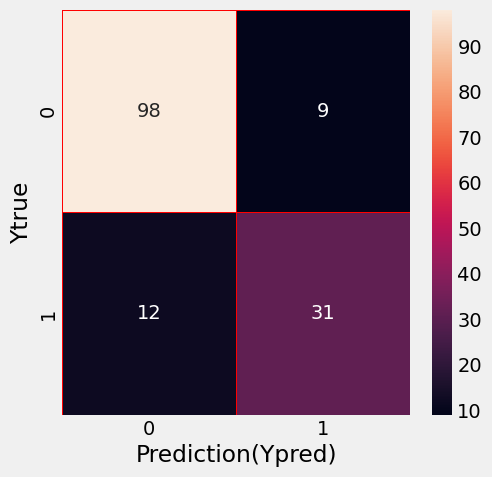

In [21]:
#Confusion Matrix

yprediciton1= LR.predict(x_test)
ytrue = y_test

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton1)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

<a id ="13"></a><br>
## K-nearest neighbors (KNN) & PCA Analysis

In [22]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train) #Calculation (In the supervise learning this section = training)
y_predict = knn.predict(x_test) #Test Section
cm = confusion_matrix(y_test, y_predict) #Plooting
acc = accuracy_score(y_test, y_predict) #Accuracy Score
score = knn.score(x_test, y_test) #acc ile burasının sonucu aynı çıkacak. Doğrulama amaçlı yapılıyor.

print("Score:",score)
print("CM:",cm)
print("Basic KNN Acc:",acc)

Score: 0.7733333333333333
CM: [[101   6]
 [ 28  15]]
Basic KNN Acc: 0.7733333333333333


In [23]:
def KNN_best_parameters(x_train,x_test,y_train,y_test):
    
    k_range = list(range(1,51)) #En uygun k değeri buluma
    weight_options = ['uniform','distance'] #En uygun weighti buluma
    #manhattan_distance = 1
    #euclidean_distance = 2
    distance_options = [1,2] #En uygun distance type buluma
    print()
    param_grid = dict(n_neighbors=k_range,weights=weight_options,p=distance_options) #Aranacak parametreleri bir sözlükte topladık.

    knn =KNeighborsClassifier() #Parametrelerin deneneceği knn oluşturuldu.
    grid = GridSearchCV(knn,param_grid,cv=10,scoring='accuracy') #Parametrelerin aranması için method
    grid.fit(x_train, y_train) #fitting ile best parm. elde edildi
    
    print('Best training score: {} with parametres: {}'.format(grid.best_score_,grid.best_params_))
    print()
    
    knn = KNeighborsClassifier(**grid.best_params_) #Test setinde deneme işlemi için
    knn.fit(x_train, y_train)
    
    y_predict_test = knn.predict(x_test)
    y_predict_train = knn.predict(x_train)

    cm_test = confusion_matrix(y_test,y_predict_test)
    cm_train = confusion_matrix(y_train,y_predict_train)

    acc_test = accuracy_score(y_test,y_predict_test)  
    acc_train = accuracy_score(y_train,y_predict_train)

    print('Test Score: {}, Train Score: {}'.format(acc_test,acc_train))
    print()
    print('CM Test:',cm_test)
    print('CM Train:',cm_train)
    
    return grid

In [24]:
grid = KNN_best_parameters(x_train,x_test,y_train,y_test)


Best training score: 0.7517796610169492 with parametres: {'n_neighbors': 39, 'p': 1, 'weights': 'distance'}

Test Score: 0.88, Train Score: 1.0

CM Test: [[102   5]
 [ 13  30]]
CM Train: [[380   0]
 [  0 217]]


In [25]:
KNNscore = grid.best_score_

Text(0.5, 1.0, 'PCA: P1 Vs P2')

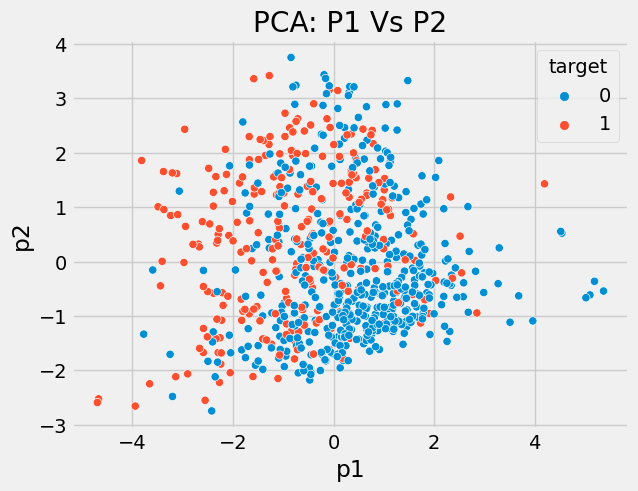

In [26]:
#%% PCA

scale = StandardScaler()
x_scaled = scaler.fit_transform(x) #x verisi bölünmeden tam bir şekilde PCA için scale edildi. 

pca = PCA(n_components=2) #2 componentli bir PCA oluşturduk.
pca.fit(x_scaled)
x_reduce_pca = pca.transform(x_scaled) #2feature'a yani boyuta düşürülmüş x 
pca_data =pd.DataFrame(x_reduce_pca,columns=['p1','p2']) #reduce datadan incelemek için bir dataframe oluşturuldu
pca_data['target'] = y #buna target eklendi. Görselleştirmek için gerekli.

sns.scatterplot(x='p1',y='p2',hue='target',data=pca_data) # targeta göre renklendirilmiş grafik
plt.title('PCA: P1 Vs P2')

In [27]:
x_train_pca, x_test_pca, y_train_pca, y_test_pca = train_test_split(x_reduce_pca,y,test_size=test_size,random_state=42)

grid_pca = KNN_best_parameters(x_train_pca, x_test_pca, y_train_pca, y_test_pca)


Best training score: 0.6901129943502825 with parametres: {'n_neighbors': 6, 'p': 1, 'weights': 'uniform'}

Test Score: 0.7733333333333333, Train Score: 0.7671691792294807

CM Test: [[95 12]
 [22 21]]
CM Train: [[354  26]
 [113 104]]


Text(0.5, 1.0, "2-Class classification (k = 6, weights = 'uniform')")

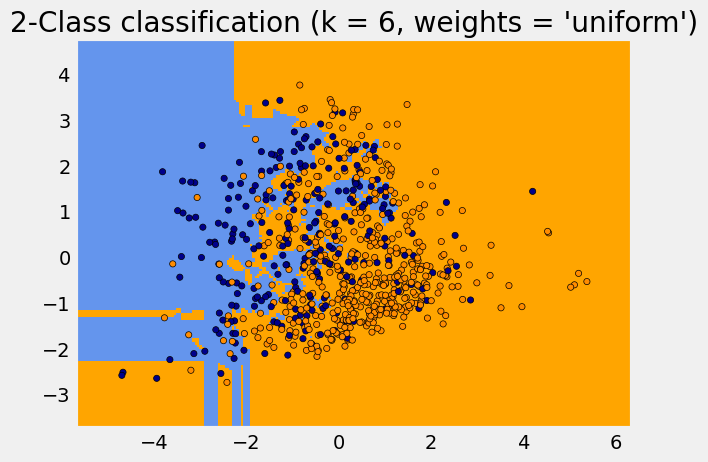

In [28]:
cmap_light = ListedColormap(['orange',  'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'darkblue'])

h = .05 # step size in the mesh
X = x_reduce_pca
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = grid_pca.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("%i-Class classification (k = %i, weights = '%s')"
          % (len(np.unique(y)),grid_pca.best_estimator_.n_neighbors, grid_pca.best_estimator_.weights))

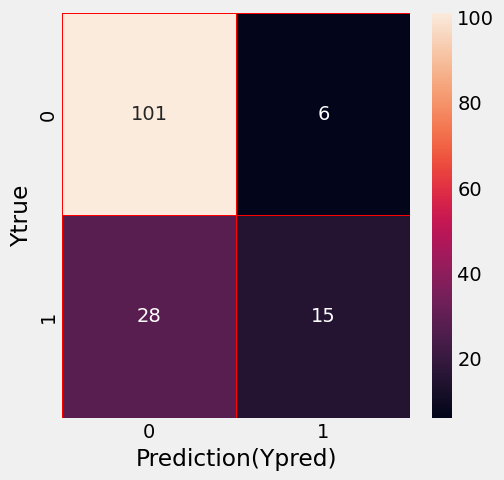

In [29]:
#Confusion Matrix

yprediciton2= knn.predict(x_test)
ytrue = y_test

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton2)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

<a id ="14"></a><br>
## Support Vector Machine (SVM)

In [30]:
#SVM with Sklearn

from sklearn.svm import SVC

SVM = SVC(random_state=42)

In [31]:
#K-fold CV
from sklearn.model_selection import cross_val_score
accuraccies = cross_val_score(estimator = SVM, X= x_train, y=y_train, cv=5)
print("Average Accuracies: ",np.mean(accuraccies))
print("Standart Deviation Accuracies: ",np.std(accuraccies))

Average Accuracies:  0.7387394957983193
Standart Deviation Accuracies:  0.060221832411610915


In [32]:
SVM.fit(x_train,y_train)  #learning 
#SVM Test 
print ("SVM Accuracy:", SVM.score(x_test,y_test))

SVMscore = SVM.score(x_test,y_test)

SVM Accuracy: 0.84


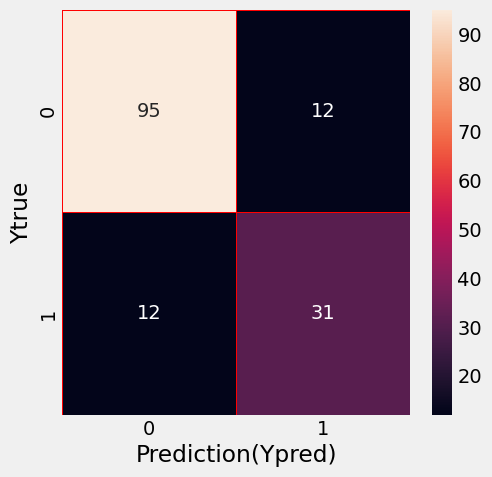

In [33]:
#Confusion Matrix

yprediciton3= SVM.predict(x_test)
ytrue = y_test

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton3)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

<a id ="15"></a><br>
## Naive Bayes (NB)

In [34]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()

In [35]:
#K-fold CV
from sklearn.model_selection import cross_val_score
accuraccies = cross_val_score(estimator = NB, X= x_train, y=y_train, cv=35)
print("Average Accuracies: ",np.mean(accuraccies))
print("Standart Deviation Accuracies: ",np.std(accuraccies))

Average Accuracies:  0.7342670401493933
Standart Deviation Accuracies:  0.11802970097658376


In [36]:
NB.fit(x_train,y_train) #learning
#prediction
print("Accuracy of NB Score: ", NB.score(x_test,y_test))

NBscore= NB.score(x_test,y_test)

Accuracy of NB Score:  0.84


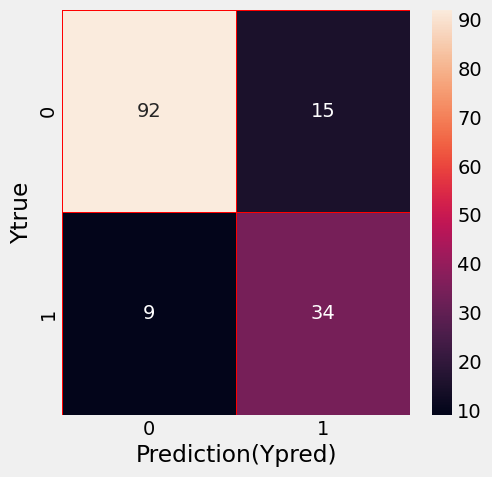

In [37]:
#Confusion Matrix

yprediciton4= NB.predict(x_test)
ytrue = y_test

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton4)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

<a id ="16"></a><br>
## Decision Tree
<img src="https://emerj.com/wp-content/uploads/2018/04/3049155-poster-p-1-machine-learning-is-just-a-big-game-of-plinko.gif" width="500px">


In [38]:
#Decision Tree Algorithm

from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier()

In [39]:
#K-fold CV
from sklearn.model_selection import cross_val_score
accuraccies = cross_val_score(estimator = DTC, X= x_train, y=y_train, cv=55)
print("Average Accuracies: ",np.mean(accuraccies))
print("Standart Deviation Accuracies: ",np.std(accuraccies))

Average Accuracies:  0.6580165289256198
Standart Deviation Accuracies:  0.15719642642603135


In [40]:
DTC.fit(x_train,y_train) #learning
#prediciton
print("Decision Tree Score: ",DTC.score(x_test,y_test))
DTCscore = DTC.score(x_test,y_test)

Decision Tree Score:  0.7333333333333333


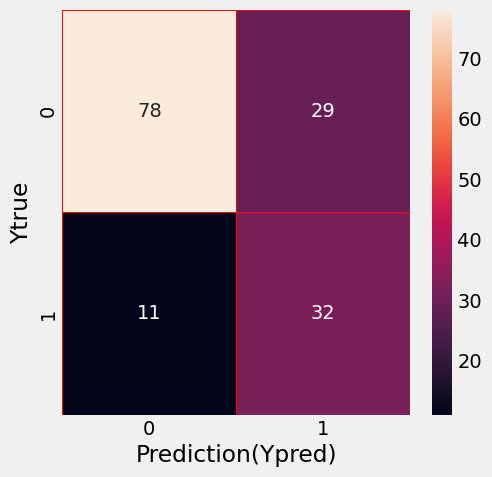

In [41]:
#Confusion Matrix

yprediciton5= DTC.predict(x_test)
ytrue = y_test

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton5)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

<a id ="17"></a><br>
# Random Forest

In [42]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier
RFC= RandomForestClassifier(n_estimators = 82, random_state=42) #n_estimator = DT

In [43]:
#K-fold CV
from sklearn.model_selection import cross_val_score
accuraccies = cross_val_score(estimator = RFC, X= x_train, y=y_train, cv=10)
print("Average Accuracies: ",np.mean(accuraccies))
print("Standart Deviation Accuracies: ",np.std(accuraccies))

Average Accuracies:  0.7468926553672316
Standart Deviation Accuracies:  0.058511137891561996


In [44]:
RFC.fit(x_train,y_train) # learning
print("Random Forest Score: ",RFC.score(x_test,y_test))
RFCscore=RFC.score(x_test,y_test)

Random Forest Score:  0.8733333333333333


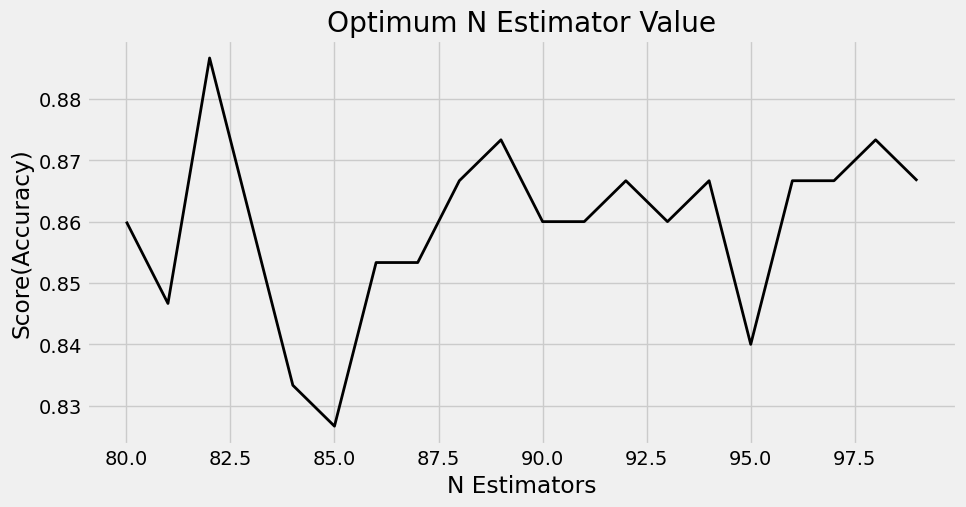

In [45]:
#Find Optimum K value
scores = []
for each in range(80,100):
    RFfind = RandomForestClassifier(n_estimators = each)
    RFfind.fit(x_train,y_train)
    scores.append(RFfind.score(x_test,y_test))
    
plt.figure(1, figsize=(10, 5))
plt.plot(range(80,100),scores,color="black",linewidth=2)
plt.title("Optimum N Estimator Value")
plt.xlabel("N Estimators")
plt.ylabel("Score(Accuracy)")
plt.grid(True)
plt.show()

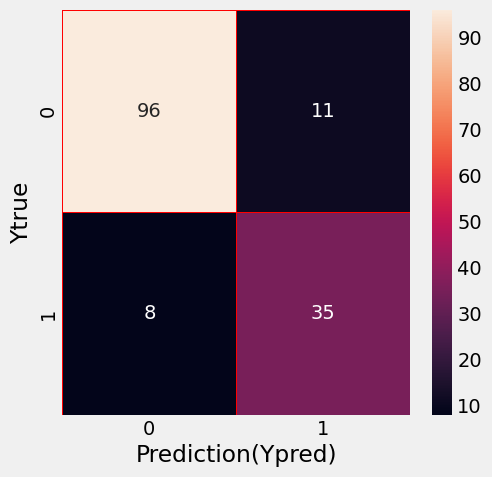

In [46]:
#Confusion Matrix

yprediciton6= RFC.predict(x_test)
ytrue = y_test

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(ytrue,yprediciton6)

#CM visualization

import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(CM,annot = True, linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Prediction(Ypred)")
plt.ylabel("Ytrue")
plt.show()

<a id ="18"></a><br>
# Artificial Neural Network (ANN)

In [47]:
#Import Library
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential 
from keras.layers import Dense

In [48]:
def buildclassifier():
    classifier = Sequential() #initialize NN
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform',activation = 'relu', input_dim =x_train.shape[1]))
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform',activation = 'relu'))
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform',activation = 'relu'))
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform',activation = 'relu'))
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform',activation = 'relu'))
    classifier.add(Dense(units = 24, kernel_initializer = 'uniform',activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform',activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])
    return classifier

In [49]:
classifier = KerasClassifier(build_fn = buildclassifier, epochs = 500)
accuracies = cross_val_score(estimator = classifier, X = x_train, y= y_train, cv = 5)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))



Epoch 1/500


15/15 [==============================] - 3s 3ms/step - loss: 0.6919 - accuracy: 0.6583
Epoch 2/500
15/15 [==============================] - 0s 2ms/step - loss: 0.6884 - accuracy: 0.6583
Epoch 3/500
15/15 [==============================] - 0s 2ms/step - loss: 0.6839 - accuracy: 0.6583
Epoch 4/500
15/15 [==============================] - 0s 2ms/step - loss: 0.6763 - accuracy: 0.6583
Epoch 5/500
15/15 [==============================] - 0s 2ms/step - loss: 0.6599 - accuracy: 0.6583
Epoch 6/500
15/15 [==============================] - 0s 3ms/step - loss: 0.6182 - accuracy: 0.6583
Epoch 7/500
15/15 [==============================] - 0s 2ms/step - loss: 0.5460 - accuracy: 0.6583
Epoch 8/500
15/15 [==============================] - 0s 2ms/step - loss: 0.5048 - accuracy: 0.6583
Epoch 9/500
15/15 [==============================] - 0s 2ms/step - loss: 0.4831 - accuracy: 0.6583
Epoch 10/500
15/15 [==============================] - 0s 3ms/step - loss: 0.4756 - accuracy: 0.6583
Epoch

15/15 [==============================] - 0s 2ms/step - loss: 0.2986 - accuracy: 0.8637
Epoch 156/500
15/15 [==============================] - 0s 2ms/step - loss: 0.2925 - accuracy: 0.8742
Epoch 157/500
15/15 [==============================] - 0s 2ms/step - loss: 0.2914 - accuracy: 0.8721
Epoch 158/500
15/15 [==============================] - 0s 2ms/step - loss: 0.3071 - accuracy: 0.8637
Epoch 159/500
15/15 [==============================] - 0s 1ms/step - loss: 0.3336 - accuracy: 0.8532
Epoch 160/500
15/15 [==============================] - 0s 3ms/step - loss: 0.3567 - accuracy: 0.8365
Epoch 161/500
15/15 [==============================] - 0s 3ms/step - loss: 0.3179 - accuracy: 0.8553
Epoch 162/500
15/15 [==============================] - 0s 2ms/step - loss: 0.3250 - accuracy: 0.8428
Epoch 163/500
15/15 [==============================] - 0s 2ms/step - loss: 0.3203 - accuracy: 0.8512
Epoch 164/500
15/15 [==============================] - 0s 3ms/step - loss: 0.3094 - accuracy: 0.8679
Epoc

15/15 [==============================] - 0s 2ms/step - loss: 0.2620 - accuracy: 0.8805
Epoch 318/500
15/15 [==============================] - 0s 2ms/step - loss: 0.2366 - accuracy: 0.8973
Epoch 319/500
15/15 [==============================] - 0s 2ms/step - loss: 0.2902 - accuracy: 0.8826
Epoch 320/500
15/15 [==============================] - 0s 2ms/step - loss: 0.2903 - accuracy: 0.8805
Epoch 321/500
15/15 [==============================] - 0s 2ms/step - loss: 0.3245 - accuracy: 0.8826
Epoch 322/500
15/15 [==============================] - 0s 2ms/step - loss: 0.2942 - accuracy: 0.8826
Epoch 323/500
15/15 [==============================] - 0s 2ms/step - loss: 0.2403 - accuracy: 0.8973
Epoch 324/500
15/15 [==============================] - 0s 2ms/step - loss: 0.2153 - accuracy: 0.9119
Epoch 325/500
15/15 [==============================] - 0s 2ms/step - loss: 0.1977 - accuracy: 0.9245
Epoch 326/500
15/15 [==============================] - 0s 2ms/step - loss: 0.1944 - accuracy: 0.9182
Epoc

15/15 [==============================] - 0s 2ms/step - loss: 0.0858 - accuracy: 0.9748
Epoch 480/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0828 - accuracy: 0.9811
Epoch 481/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0830 - accuracy: 0.9811
Epoch 482/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0805 - accuracy: 0.9790
Epoch 483/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0789 - accuracy: 0.9769
Epoch 484/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0773 - accuracy: 0.9811
Epoch 485/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0763 - accuracy: 0.9832
Epoch 486/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0772 - accuracy: 0.9811
Epoch 487/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0754 - accuracy: 0.9832
Epoch 488/500
15/15 [==============================] - 0s 2ms/step - loss: 0.0751 - accuracy: 0.9832
Epoc

15/15 [==============================] - 0s 2ms/step - loss: 0.4181 - accuracy: 0.8092
Epoch 61/500
15/15 [==============================] - 0s 2ms/step - loss: 0.4199 - accuracy: 0.8113
Epoch 62/500
15/15 [==============================] - 0s 2ms/step - loss: 0.4188 - accuracy: 0.8029
Epoch 63/500
15/15 [==============================] - 0s 1ms/step - loss: 0.4166 - accuracy: 0.8071
Epoch 64/500
15/15 [==============================] - 0s 2ms/step - loss: 0.4105 - accuracy: 0.8113
Epoch 65/500
15/15 [==============================] - 0s 3ms/step - loss: 0.4244 - accuracy: 0.7987
Epoch 66/500
15/15 [==============================] - 0s 2ms/step - loss: 0.4111 - accuracy: 0.8092
Epoch 67/500
15/15 [==============================] - 0s 1ms/step - loss: 0.4130 - accuracy: 0.8029
Epoch 68/500
15/15 [==============================] - 0s 2ms/step - loss: 0.4177 - accuracy: 0.8029
Epoch 69/500
15/15 [==============================] - 0s 2ms/step - loss: 0.4065 - accuracy: 0.8134
Epoch 70/500


15/15 [==============================] - 0s 2ms/step - loss: 0.3358 - accuracy: 0.8407
Epoch 223/500
15/15 [==============================] - 0s 2ms/step - loss: 0.3336 - accuracy: 0.8386
Epoch 224/500
15/15 [==============================] - 0s 2ms/step - loss: 0.3369 - accuracy: 0.8407
Epoch 225/500
15/15 [==============================] - 0s 2ms/step - loss: 0.3361 - accuracy: 0.8449
Epoch 226/500
15/15 [==============================] - 0s 2ms/step - loss: 0.3430 - accuracy: 0.8407
Epoch 227/500
15/15 [==============================] - 0s 2ms/step - loss: 0.3373 - accuracy: 0.8428
Epoch 228/500
15/15 [==============================] - 0s 2ms/step - loss: 0.3333 - accuracy: 0.8449
Epoch 229/500
15/15 [==============================] - 0s 2ms/step - loss: 0.3332 - accuracy: 0.8407
Epoch 230/500
15/15 [==============================] - 0s 2ms/step - loss: 0.3248 - accuracy: 0.8449
Epoch 231/500
15/15 [==============================] - 0s 2ms/step - loss: 0.3409 - accuracy: 0.8323
Epoc

15/15 [==============================] - 0s 2ms/step - loss: 0.2874 - accuracy: 0.8700
Epoch 385/500
15/15 [==============================] - 0s 2ms/step - loss: 0.2872 - accuracy: 0.8700
Epoch 386/500
15/15 [==============================] - 0s 2ms/step - loss: 0.2873 - accuracy: 0.8700
Epoch 387/500
15/15 [==============================] - 0s 2ms/step - loss: 0.2869 - accuracy: 0.8700
Epoch 388/500
15/15 [==============================] - 0s 2ms/step - loss: 0.2869 - accuracy: 0.8700
Epoch 389/500
15/15 [==============================] - 0s 2ms/step - loss: 0.2868 - accuracy: 0.8700
Epoch 390/500
15/15 [==============================] - 0s 2ms/step - loss: 0.2868 - accuracy: 0.8700
Epoch 391/500
15/15 [==============================] - 0s 2ms/step - loss: 0.2867 - accuracy: 0.8700
Epoch 392/500
15/15 [==============================] - 0s 2ms/step - loss: 0.2865 - accuracy: 0.8700
Epoch 393/500
15/15 [==============================] - 0s 2ms/step - loss: 0.2864 - accuracy: 0.8700
Epoc

15/15 [==============================] - 0s 5ms/step - loss: 0.4527 - accuracy: 0.7971
Epoch 46/500
15/15 [==============================] - 0s 4ms/step - loss: 0.4487 - accuracy: 0.7992
Epoch 47/500
15/15 [==============================] - 0s 4ms/step - loss: 0.4477 - accuracy: 0.7992
Epoch 48/500
15/15 [==============================] - 0s 3ms/step - loss: 0.4460 - accuracy: 0.8117
Epoch 49/500
15/15 [==============================] - 0s 3ms/step - loss: 0.4433 - accuracy: 0.8033
Epoch 50/500
15/15 [==============================] - 0s 3ms/step - loss: 0.4439 - accuracy: 0.7971
Epoch 51/500
15/15 [==============================] - 0s 3ms/step - loss: 0.4444 - accuracy: 0.7929
Epoch 52/500
15/15 [==============================] - 0s 3ms/step - loss: 0.4463 - accuracy: 0.7929
Epoch 53/500
15/15 [==============================] - 0s 4ms/step - loss: 0.4424 - accuracy: 0.7971
Epoch 54/500
15/15 [==============================] - 0s 5ms/step - loss: 0.4399 - accuracy: 0.8054
Epoch 55/500


15/15 [==============================] - 0s 3ms/step - loss: 0.2917 - accuracy: 0.8870
Epoch 208/500
15/15 [==============================] - 0s 4ms/step - loss: 0.2831 - accuracy: 0.8996
Epoch 209/500
15/15 [==============================] - 0s 4ms/step - loss: 0.2879 - accuracy: 0.8933
Epoch 210/500
15/15 [==============================] - 0s 3ms/step - loss: 0.2968 - accuracy: 0.8870
Epoch 211/500
15/15 [==============================] - 0s 5ms/step - loss: 0.3036 - accuracy: 0.8828
Epoch 212/500
15/15 [==============================] - 0s 4ms/step - loss: 0.3000 - accuracy: 0.8849
Epoch 213/500
15/15 [==============================] - 0s 3ms/step - loss: 0.2968 - accuracy: 0.8870
Epoch 214/500
15/15 [==============================] - 0s 3ms/step - loss: 0.2956 - accuracy: 0.8849
Epoch 215/500
15/15 [==============================] - 0s 3ms/step - loss: 0.2990 - accuracy: 0.8891
Epoch 216/500
15/15 [==============================] - 0s 4ms/step - loss: 0.3120 - accuracy: 0.8703
Epoc

15/15 [==============================] - 0s 3ms/step - loss: 0.1762 - accuracy: 0.9268
Epoch 370/500
15/15 [==============================] - 0s 2ms/step - loss: 0.1764 - accuracy: 0.9226
Epoch 371/500
15/15 [==============================] - 0s 3ms/step - loss: 0.1804 - accuracy: 0.9184
Epoch 372/500
15/15 [==============================] - 0s 3ms/step - loss: 0.1628 - accuracy: 0.9226
Epoch 373/500
15/15 [==============================] - 0s 3ms/step - loss: 0.1550 - accuracy: 0.9247
Epoch 374/500
15/15 [==============================] - 0s 2ms/step - loss: 0.1594 - accuracy: 0.9247
Epoch 375/500
15/15 [==============================] - 0s 2ms/step - loss: 0.1490 - accuracy: 0.9289
Epoch 376/500
15/15 [==============================] - 0s 3ms/step - loss: 0.1504 - accuracy: 0.9247
Epoch 377/500
15/15 [==============================] - 0s 2ms/step - loss: 0.1580 - accuracy: 0.9226
Epoch 378/500
15/15 [==============================] - 0s 2ms/step - loss: 0.1470 - accuracy: 0.9268
Epoc

15/15 [==============================] - 0s 2ms/step - loss: 0.4346 - accuracy: 0.7971
Epoch 31/500
15/15 [==============================] - 0s 2ms/step - loss: 0.4337 - accuracy: 0.7929
Epoch 32/500
15/15 [==============================] - 0s 2ms/step - loss: 0.4336 - accuracy: 0.7866
Epoch 33/500
15/15 [==============================] - 0s 2ms/step - loss: 0.4312 - accuracy: 0.7992
Epoch 34/500
15/15 [==============================] - 0s 2ms/step - loss: 0.4256 - accuracy: 0.7992
Epoch 35/500
15/15 [==============================] - 0s 2ms/step - loss: 0.4246 - accuracy: 0.8033
Epoch 36/500
15/15 [==============================] - 0s 2ms/step - loss: 0.4228 - accuracy: 0.7992
Epoch 37/500
15/15 [==============================] - 0s 2ms/step - loss: 0.4198 - accuracy: 0.8117
Epoch 38/500
15/15 [==============================] - 0s 2ms/step - loss: 0.4201 - accuracy: 0.7929
Epoch 39/500
15/15 [==============================] - 0s 2ms/step - loss: 0.4176 - accuracy: 0.8054
Epoch 40/500


15/15 [==============================] - 0s 3ms/step - loss: 0.2533 - accuracy: 0.9247
Epoch 193/500
15/15 [==============================] - 0s 3ms/step - loss: 0.2302 - accuracy: 0.9289
Epoch 194/500
15/15 [==============================] - 0s 3ms/step - loss: 0.2386 - accuracy: 0.9226
Epoch 195/500
15/15 [==============================] - 0s 3ms/step - loss: 0.2415 - accuracy: 0.9289
Epoch 196/500
15/15 [==============================] - 0s 3ms/step - loss: 0.2541 - accuracy: 0.9184
Epoch 197/500
15/15 [==============================] - 0s 4ms/step - loss: 0.2610 - accuracy: 0.9100
Epoch 198/500
15/15 [==============================] - 0s 3ms/step - loss: 0.2478 - accuracy: 0.9121
Epoch 199/500
15/15 [==============================] - 0s 4ms/step - loss: 0.2305 - accuracy: 0.9331
Epoch 200/500
15/15 [==============================] - 0s 4ms/step - loss: 0.2230 - accuracy: 0.9331
Epoch 201/500
15/15 [==============================] - 0s 3ms/step - loss: 0.2224 - accuracy: 0.9435
Epoc

15/15 [==============================] - 0s 4ms/step - loss: 0.2028 - accuracy: 0.9310
Epoch 355/500
15/15 [==============================] - 0s 3ms/step - loss: 0.1856 - accuracy: 0.9435
Epoch 356/500
15/15 [==============================] - 0s 3ms/step - loss: 0.1620 - accuracy: 0.9540
Epoch 357/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1603 - accuracy: 0.9540
Epoch 358/500
15/15 [==============================] - 0s 3ms/step - loss: 0.1552 - accuracy: 0.9561
Epoch 359/500
15/15 [==============================] - 0s 2ms/step - loss: 0.1505 - accuracy: 0.9561
Epoch 360/500
15/15 [==============================] - 0s 3ms/step - loss: 0.1467 - accuracy: 0.9582
Epoch 361/500
15/15 [==============================] - 0s 3ms/step - loss: 0.1556 - accuracy: 0.9561
Epoch 362/500
15/15 [==============================] - 0s 4ms/step - loss: 0.1475 - accuracy: 0.9603
Epoch 363/500
15/15 [==============================] - 0s 3ms/step - loss: 0.1605 - accuracy: 0.9519
Epoc

15/15 [==============================] - 0s 2ms/step - loss: 0.5076 - accuracy: 0.7594
Epoch 16/500
15/15 [==============================] - 0s 2ms/step - loss: 0.5004 - accuracy: 0.7678
Epoch 17/500
15/15 [==============================] - 0s 2ms/step - loss: 0.4949 - accuracy: 0.7657
Epoch 18/500
15/15 [==============================] - 0s 2ms/step - loss: 0.4892 - accuracy: 0.7594
Epoch 19/500
15/15 [==============================] - 0s 2ms/step - loss: 0.4881 - accuracy: 0.7636
Epoch 20/500
15/15 [==============================] - 0s 2ms/step - loss: 0.4848 - accuracy: 0.7762
Epoch 21/500
15/15 [==============================] - 0s 2ms/step - loss: 0.4809 - accuracy: 0.7720
Epoch 22/500
15/15 [==============================] - 0s 2ms/step - loss: 0.4813 - accuracy: 0.7720
Epoch 23/500
15/15 [==============================] - 0s 2ms/step - loss: 0.4794 - accuracy: 0.7720
Epoch 24/500
15/15 [==============================] - 0s 2ms/step - loss: 0.4758 - accuracy: 0.7762
Epoch 25/500


15/15 [==============================] - 0s 3ms/step - loss: 0.3542 - accuracy: 0.8556
Epoch 98/500
15/15 [==============================] - 0s 3ms/step - loss: 0.3493 - accuracy: 0.8640
Epoch 99/500
15/15 [==============================] - 0s 4ms/step - loss: 0.3515 - accuracy: 0.8577
Epoch 100/500
15/15 [==============================] - 0s 3ms/step - loss: 0.3488 - accuracy: 0.8640
Epoch 101/500
15/15 [==============================] - 0s 3ms/step - loss: 0.3461 - accuracy: 0.8703
Epoch 102/500
15/15 [==============================] - 0s 3ms/step - loss: 0.3427 - accuracy: 0.8661
Epoch 103/500
15/15 [==============================] - 0s 3ms/step - loss: 0.3378 - accuracy: 0.8724
Epoch 104/500
15/15 [==============================] - 0s 2ms/step - loss: 0.3402 - accuracy: 0.8661
Epoch 105/500
15/15 [==============================] - 0s 3ms/step - loss: 0.3367 - accuracy: 0.8724
Epoch 106/500
15/15 [==============================] - 0s 3ms/step - loss: 0.3471 - accuracy: 0.8619
Epoch 

15/15 [==============================] - 0s 3ms/step - loss: 0.2134 - accuracy: 0.9059
Epoch 260/500
15/15 [==============================] - 0s 3ms/step - loss: 0.2443 - accuracy: 0.8954
Epoch 261/500
15/15 [==============================] - 0s 7ms/step - loss: 0.2287 - accuracy: 0.9038
Epoch 262/500
15/15 [==============================] - 0s 3ms/step - loss: 0.2217 - accuracy: 0.9038
Epoch 263/500
15/15 [==============================] - 0s 3ms/step - loss: 0.2101 - accuracy: 0.9079
Epoch 264/500
15/15 [==============================] - 0s 4ms/step - loss: 0.1790 - accuracy: 0.9184
Epoch 265/500
15/15 [==============================] - 0s 3ms/step - loss: 0.1582 - accuracy: 0.9289
Epoch 266/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1567 - accuracy: 0.9268
Epoch 267/500
15/15 [==============================] - 0s 3ms/step - loss: 0.1518 - accuracy: 0.9268
Epoch 268/500
15/15 [==============================] - 0s 3ms/step - loss: 0.1554 - accuracy: 0.9268
Epoc

15/15 [==============================] - 0s 3ms/step - loss: 0.1212 - accuracy: 0.9519
Epoch 422/500
15/15 [==============================] - 0s 3ms/step - loss: 0.1503 - accuracy: 0.9477
Epoch 423/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1692 - accuracy: 0.9393
Epoch 424/500
15/15 [==============================] - 0s 3ms/step - loss: 0.1331 - accuracy: 0.9456
Epoch 425/500
15/15 [==============================] - 0s 3ms/step - loss: 0.1455 - accuracy: 0.9393
Epoch 426/500
15/15 [==============================] - 0s 3ms/step - loss: 0.1117 - accuracy: 0.9582
Epoch 427/500
15/15 [==============================] - 0s 3ms/step - loss: 0.1226 - accuracy: 0.9477
Epoch 428/500
15/15 [==============================] - 0s 3ms/step - loss: 0.1065 - accuracy: 0.9603
Epoch 429/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0928 - accuracy: 0.9749
Epoch 430/500
15/15 [==============================] - 0s 3ms/step - loss: 0.0957 - accuracy: 0.9644
Epoc

In [50]:
ANNmean = accuracies.mean()

<a id ="19"></a><br>
## Gradient Boosting Machine (GBM)

In [51]:
from sklearn.ensemble import GradientBoostingClassifier
gbm_model = GradientBoostingClassifier().fit(x_train, y_train)

y_pred = gbm_model.predict(x_test)
testscore_gbm=accuracy_score(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.8466666666666667

In [52]:
### Model Tuning

gbm_params = {"learning_rate" : [0.001, 0.01],
             "n_estimators": [100,500],
             "max_depth": [3,10],
             "min_samples_split": [2,10]}

gbm = GradientBoostingClassifier()

gbm_cv = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
gbm_cv.fit(x_train, y_train)

print("The Best Parameters: " + str(gbm_cv.best_params_))

Fitting 10 folds for each of 16 candidates, totalling 160 fits
The Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}


In [53]:
gbm = GradientBoostingClassifier(learning_rate = 0.01, 
                                 max_depth = 3,
                                min_samples_split = 2,
                                n_estimators = 100)

gbm_tuned =  gbm.fit(x_train,y_train)
y_pred = gbm_tuned.predict(x_test)
crosscore_gbm=accuracy_score(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.8333333333333334

In [54]:
gbmscore = gbm.score(x_test,y_test)

<a id ="20"></a><br>
# Evaluation of Results

<a id ="21"></a><br>
## F1 Score Calculation

In [55]:
#F1-Score For Logistic Regression
from sklearn.metrics import f1_score
LRf1 = f1_score(ytrue, yprediciton1, average='weighted') 
LRf1

0.8584376214535561

In [56]:
#K-NN
KNNf1= f1_score(ytrue, yprediciton2, average='weighted') 
KNNf1

0.7449399717514125

In [57]:
#SVM
SVMf1=f1_score(ytrue, yprediciton3, average='weighted') 
SVMf1

0.84

In [58]:
#naive bayes
NBf1 = f1_score(ytrue, yprediciton4, average='weighted') 
NBf1

0.8429096989966555

In [59]:
#Decision Tree
DTf1=f1_score(ytrue, yprediciton5, average='weighted') 
DTf1

0.7441653584510728

In [60]:
#RandomForest
RFf1=f1_score(ytrue, yprediciton6, average='weighted') 
RFf1

0.8745676908603582

<a id ="22"></a><br>
## Visualization Result

In [61]:
scores=[LRscore,KNNscore,SVMscore,NBscore,DTCscore,RFCscore,mean,gbmscore]
AlgorthmsName=["Logistic Regression","K-NN","SVM","Naive Bayes","Decision Tree", "Random Forest","Artificial Neural Network","Gradient Boosting Machine"]

#create traces

trace1 = go.Scatter(
    x = AlgorthmsName,
    y= scores,
    name='Algortms Name',
    marker =dict(color='rgba(0,255,0,0.5)',
               line =dict(color='rgb(0,0,0)',width=2)),
                text=AlgorthmsName
)
data = [trace1]

layout = go.Layout(barmode = "group",
                  xaxis= dict(title= 'ML Algorithms',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Prediction Scores',ticklen= 5,zeroline= False))
fig = go.Figure(data = data, layout = layout)
iplot(fig)

## Scatter Plot For Comparasion of ML Algorithms Prediciton Scores (F1)

In [62]:
scoresf1=[LRf1,KNNf1,SVMf1,NBf1,DTf1,RFf1]
#create traces

trace1 = go.Scatter(
    x = AlgorthmsName,
    y= scoresf1,
    name='Algortms Name',
    marker =dict(color='rgba(225,126,0,0.5)',
               line =dict(color='rgb(0,0,0)',width=2)),
                text=AlgorthmsName
)
data = [trace1]

layout = go.Layout(barmode = "group", 
                  xaxis= dict(title= 'ML Algorithms',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Prediction Scores(F1)',ticklen= 5,zeroline= False))
fig = go.Figure(data = data, layout = layout)
iplot(fig)

# Results Table for models :

Here's the summary of accuracy scores for each algorithm:

|List|ML Algorithm|Accuracy|F1 Score|
|-|-|-|-|
|1|Logistic Regression|86.00%|85.84%|
|2|K-NN (K-Nearest Neighbors)|77.33%|74.49%|
|3|SVM (Support Vector Machine)|84.00%|84.00%|
|4|Naive Bayes|84.00%|84.29%|
|5|Decision Tree|73.33%|74.41%|
|6|Random Forest |87.33%|87.45%|
|7|Artificial Neural Network|70.69%|78.92%|
|8|Gradient Boosting Machine|84.66%|79.59%|

So, Random Forest is the algorithm with the highest accuracy among those listed.
